In [1]:
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display as d
from IPython.display import Markdown

In [2]:
np.random.seed(123456)
n_samples = 2000
sample_size = 1000
mu = 100
sigma = 20
# Significance level for KS
alpha = 0.05
c_a = 1.36

In [3]:
def zscore(x, mu=mu, sigma=sigma):
    '''Calculate the z score for a sample
    
    Arguments:
    x (np.array or iterable of float): the sample
    mu: The population mean
    sigma: the population standard deviation
    
    returns:
    z score (float)
    '''
    mean, N = np.mean(x), len(x)
    return (mu - mean) / sigma * np.sqrt(N)

In [4]:
dists = [
    np.random.poisson(lam=mu, size=sample_size)
    for _ in range(n_samples)
]

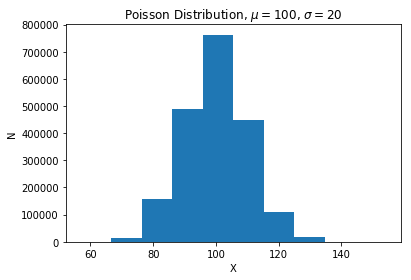


**Figure 1:** The distribution of all points from 2000 Poisson distribution samples of size 1000 
with $\mu=100$ and $\sigma=20$.


In [5]:
plt.hist(np.array(dists).flatten())
plt.title(r'Poisson Distribution, $\mu={}$, $\sigma={}$'.format(mu, sigma))
plt.xlabel('X')
plt.ylabel('N')
plt.show()
Markdown('''
**Figure 1:** The distribution of all points from {} Poisson distribution samples of size {} 
with $\mu={}$ and $\sigma={}$.
'''.format(n_samples, sample_size, mu, sigma))

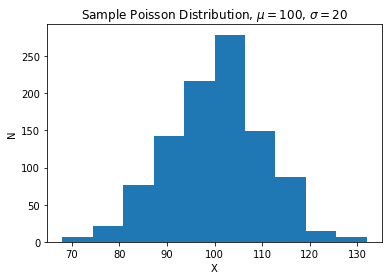


**Figure 2:** The distribution of a sample Poisson distribution of size 1000 
with $\mu=100$ and $\sigma=20$.


In [6]:
plt.hist(dists[0])
plt.title(r'Sample Poisson Distribution, $\mu={}$, $\sigma={}$'.format(mu, sigma))
plt.xlabel('X')
plt.ylabel('N')
plt.show()
Markdown('''
**Figure 2:** The distribution of a sample Poisson distribution of size {} 
with $\mu={}$ and $\sigma={}$.
'''.format(sample_size, mu, sigma))

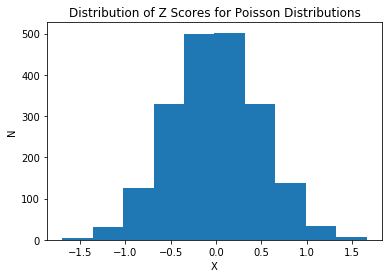


**Figure 3:** The distribution of z statistics for 2000 Poisson distributions of size 1000 
with $\mu=100$ and $\sigma=20$.


In [7]:
z_scores = [zscore(x) for x in dists]
plt.hist(z_scores)
plt.title(r'Distribution of Z Scores for Poisson Distributions')
plt.xlabel('X')
plt.ylabel('N')
plt.show()
Markdown('''
**Figure 3:** The distribution of z statistics for {} Poisson distributions of size {} 
with $\mu={}$ and $\sigma={}$.
'''.format(n_samples, sample_size, mu, sigma))

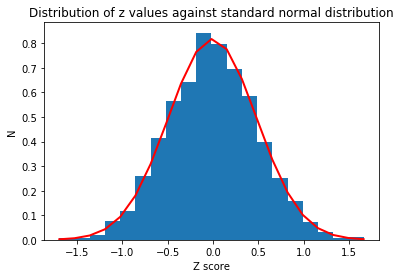


**Figure 4:** The distribution of z scores from 2000 sample Poisson distributions of size 1000, compared against a 
standard normal distribution.


In [8]:
(mu, sigma) = st.norm.fit(z_scores)
bin_vals, bins, _ = plt.hist(z_scores, 20, normed=True)

# add a 'best fit' line
gaus = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, gaus, 'r', linewidth=2)

plt.title('Distribution of z values against standard normal distribution')
plt.xlabel('Z score')
plt.ylabel('N')
plt.show()
Markdown('''
**Figure 4:** The distribution of z scores from {} sample Poisson distributions of size {}, compared against a 
standard normal distribution.
'''.format(n_samples, sample_size))

In [9]:
print('Critical KS Value: {}'.format(c_a * np.sqrt(2 / len(bins))))
st.kstest(z_scores, 'norm')

Critical KS Value: 0.41970511189689


KstestResult(statistic=0.16932506172820461, pvalue=0.0)

#### Though the p value is close to zero (unsure how close because of a lack of significant digits), the KS value is below the critical KS value, preventing the null hypothesis from being rejected.